# RAVDESS

Répartition des émotions dans le dataset RAVDESS :
Emotion
Calm         192
Happy        192
Sad          192
Angry        192
Fearful      192
Disgust      192
Surprised    192
Neutral       96
Name: count, dtype: int64


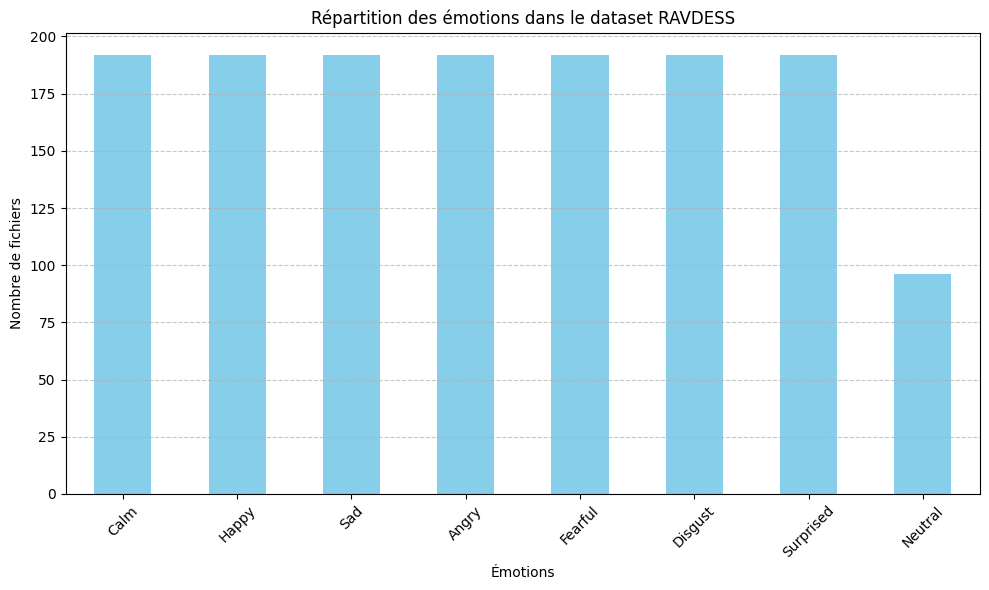

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Chemin du dataset
dataset_path = "../dataset/RAVDESS"  # Remplacez par le chemin correct

# Liste pour stocker les informations extraites des noms de fichiers
data = []

# Parcours des fichiers dans le dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav") or file.endswith(".mp4"):  # Filtrer par types de fichiers
            # Découper le nom du fichier selon le schéma
            parts = file.split("-")
            if len(parts) == 7:
                modality = parts[0]
                vocal_channel = parts[1]
                emotion = int(parts[2])  # Convertir en entier pour faciliter l'analyse
                intensity = parts[3]
                statement = parts[4]
                repetition = parts[5]
                actor = parts[6].split(".")[0]  # Supprimer l'extension

                # Ajouter les informations à la liste
                data.append({
                    "Modality": modality,
                    "Vocal_Channel": vocal_channel,
                    "Emotion": emotion,
                    "Intensity": intensity,
                    "Statement": statement,
                    "Repetition": repetition,
                    "Actor": actor
                })

# Convertir les données en dataframe Pandas
df = pd.DataFrame(data)

# Mapper les émotions à leurs noms
emotion_mapping = {
    1: "Neutral",
    2: "Calm",
    3: "Happy",
    4: "Sad",
    5: "Angry",
    6: "Fearful",
    7: "Disgust",
    8: "Surprised"
}
df["Emotion"] = df["Emotion"].map(emotion_mapping)

# Calculer la répartition des émotions
emotion_counts = df["Emotion"].value_counts()

# Afficher les résultats
print("Répartition des émotions dans le dataset RAVDESS :")
print(emotion_counts)

# Visualiser la répartition avec un graphique
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Répartition des émotions dans le dataset RAVDESS")
plt.xlabel("Émotions")
plt.ylabel("Nombre de fichiers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# SAVEE

Répartition des émotions dans le dataset SAVEE :
Emotion
Neutral     120
Anger        60
Disgust      60
Fear         60
Happy        60
Sad          60
Surprise     60
Name: count, dtype: int64


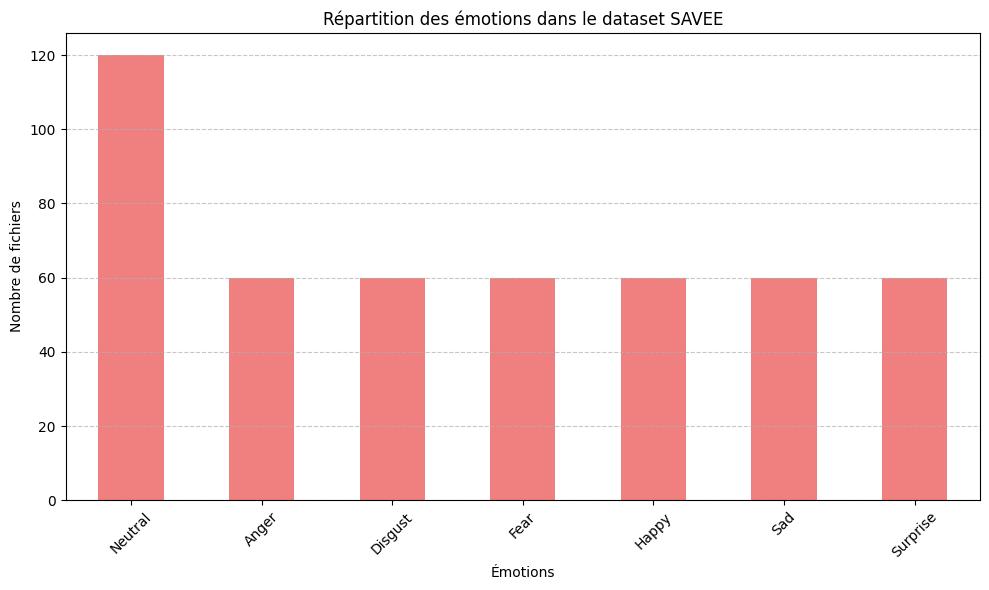

In [25]:
# Chemin du dataset
dataset_path = "../dataset/SAVEE/ALL"  # Remplacez par le chemin correct

# Liste pour stocker les informations
data = []

# Mapping des codes d'émotion à leurs noms
emotion_mapping = {
    'a': 'Anger',    # 'a' pour 'Anger'
    'su': 'Surprise', # 'su' pour 'Surprise'
    'd': 'Disgust',   # 'd' pour 'Disgust'
    'f': 'Fear',      # 'f' pour 'Fear'
    'h': 'Happy',     # 'h' pour 'Happy'
    'n': 'Neutral',   # 'n' pour 'Neutral'
    'sa': 'Sad',      # 'sa' pour 'Sad'
}

# Parcours des fichiers dans le dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):  # Filtrer uniquement les fichiers audio
            # Extraire l'émotion du nom du fichier
            filename = file.split('.')[0]  # Enlever l'extension '.wav'
            parts = filename.split('_')  # Diviser le nom du fichier par '_'
            
            # Le code de l'émotion est la deuxième partie du nom (ex. 'a', 'su', etc.)
            emotion_code = parts[1]
            if emotion_code[0] == "s":
                emotion_code = emotion_code[0] + emotion_code[1]
            else :
                emotion_code = emotion_code[0]

            # Vérifier si l'émotion est sur deux lettres (comme 'sa' pour Sad ou 'su' pour Surprise)
            if emotion_code in emotion_mapping:
                emotion = emotion_mapping[emotion_code]
                actor = parts[0]  # L'identifiant de l'acteur est la première partie (ex. 'JE')
                data.append({"Emotion": emotion, "Actor": actor, "Filename": file})
            else:
                # Si l'émotion n'est pas trouvée dans le mapping, afficher un message d'erreur
                # print(f"Code d'émotion inattendu : {emotion_code} dans {file}")
                break


# Convertir les données en dataframe Pandas
df = pd.DataFrame(data)

# Vérifier les premières lignes du dataframe pour s'assurer que la colonne "Emotion" existe
if not df.empty:
    # Calculer la répartition des émotions
    emotion_counts = df["Emotion"].value_counts()

    # Afficher les résultats
    print("Répartition des émotions dans le dataset SAVEE :")
    print(emotion_counts)

    # Visualiser la répartition avec un graphique
    plt.figure(figsize=(10, 6))
    emotion_counts.plot(kind='bar', color='lightcoral')
    plt.title("Répartition des émotions dans le dataset SAVEE")
    plt.xlabel("Émotions")
    plt.ylabel("Nombre de fichiers")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Le dataframe est vide. Vérifiez la structure du dataset.")


# TESS

Répartition des émotions dans le dataset TESS :
Emotion
angry       800
disgust     800
fear        800
happy       800
neutral     800
surprise    800
sad         800
Name: count, dtype: int64


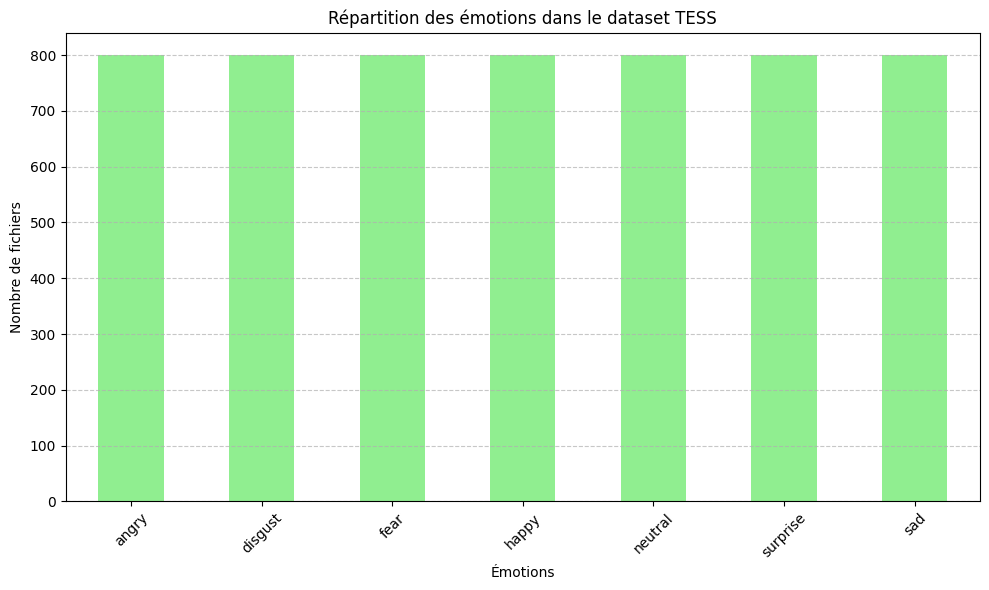

In [32]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Chemin du dataset
dataset_path = "../dataset/TESS/TESS"  # Remplacez par le chemin correct

# Liste pour stocker les informations
data = []

# Parcours des dossiers dans le dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):  # Filtrer uniquement les fichiers audio
            # Extraire l'émotion à partir du nom du fichier
            parts = file.split('_')
            if len(parts) >= 2:
                emotion = parts[2].replace('.wav', '')  # Récupérer l'émotion sans l'extension
                if emotion == 'ps':
                    emotion = 'surprise'
                data.append({"Emotion": emotion, "Filename": file})

# Convertir les données en dataframe Pandas
df = pd.DataFrame(data)

# Calculer la répartition des émotions
emotion_counts = df["Emotion"].value_counts()

# Afficher les résultats
print("Répartition des émotions dans le dataset TESS :")
print(emotion_counts)

# Visualiser la répartition avec un graphique
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='lightgreen')
plt.title("Répartition des émotions dans le dataset TESS")
plt.xlabel("Émotions")
plt.ylabel("Nombre de fichiers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

